## **VEHICLE REPAIR COST ANALYSIS**

### **PROBLEM STATEMENT**
- **Analyze the dataset to identify key insights related to vehicle repairs, customer complaints, and cost metrics.**
- **Goal is to clean the data, derive meaningful insights , and generate visual reports for stakeholder.**

**IMPORTING LIBRARIES**

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [3]:
# Loading the dataset
df = pd.read_excel('Task.xlsx')

**PREVIEW THE DATASET**

In [4]:
# Preview the dataset
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [5]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


**DATASET INFORMATION**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

The dataset contains 100 rows and 52 columns

**STATISTICAL SUMMARY**

In [7]:
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


**DISTRIBUTION OF NUMERICAL COLUMNS**

In [8]:
# Distribution of numerical columns
numeric_columns = df.select_dtypes(include = np.number)
numeric_columns.describe()

,TRANSACTION_ID,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
std,12.028166,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434
min,13021.000000,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000


**CONVERTING CATEGORICAL ATTRIBUTES TO CATEGORY TYPE**

In [9]:
categorical_col = df.select_dtypes(include = ['object']).columns
df[categorical_col] = df[categorical_col].astype('category')

**MISSING VALUES**

In [10]:
missing_values = df.isnull().sum()
missing_values

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,5
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


- Missing values in key columns like TOTALCOST, CUSTOMER_VERBAATIM

In [11]:
total_missing_values = df.isnull().sum().sum()
total_missing_values

184

- **DISTRIBUTION OF NUMERICAL COLUMNS LIKE TOTALCOST, LBRCOST, KM**

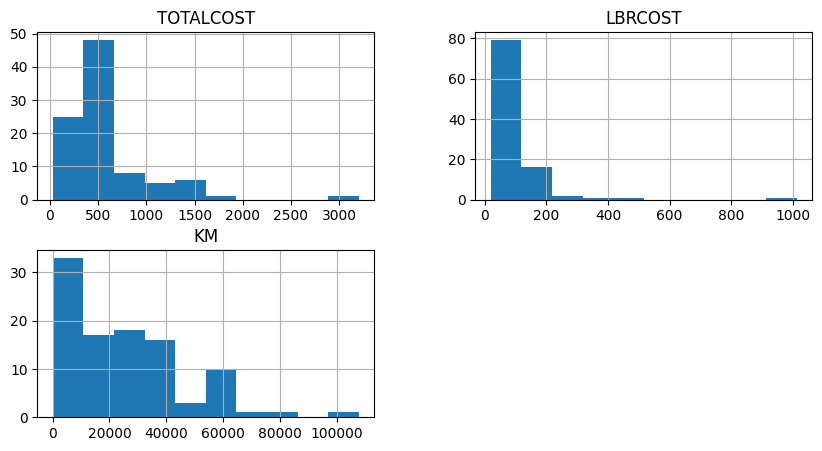

In [12]:
numerical_col = df[['TOTALCOST','LBRCOST','KM']]
numerical_col.hist(figsize = (10,5))
plt.show()

- All the above distributions are right-skewed.
- Identified missing values in key columns like TOTALCOST
- Here, In a right-skewed distribution, outliers pull the mean higher.
- The median is not affected by extreme values.

## **HANDLING MISSING VALUES**

In [13]:
# fillna with median for numerical columns, but only for numerical columns
for column in df.select_dtypes(include=np.number):
    # Calculate the median for the current numerical column, excluding non-numeric values
    median_value = df[column].median(skipna=True)
    # Fill missing values in the current numerical column with its median
    df[column].fillna(median_value, inplace=True)

<ipython-input-13-f396be1a8171>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


- TOTALCOST, LBRCOST, KM having a skewed distribution. so, median is better than mean.
- In a right-skewed distribution, prefer to using the median instead of mean.
- Mean is too high, median is better measure.

In [14]:
for column in df.select_dtypes(include = 'object'):
    df.fillna('Unknown', inplace = True)

In [15]:
# Filling missing text values with 'Unknown'
for col in ['CUSTOMER_VERBATIM', 'CORRECTION_VERBATIM', 'CAUSAL_PART_NM']:
    df[col] = df[col].cat.add_categories('Unknown').fillna('Unknown')

In [16]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [17]:
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.0,100.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,554.925900,106.344900,1.484867e+08,2.815767e+09,5.720000,1.0,14.050000,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,349.940000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,572.772500,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,439.561893,113.223074,3.079421e+08,5.790727e+06,4.040402,0.0,6.652067,0.256432,0.51434


- The dataset contains 50+ columns, so prioritize the most relevant ones for analysis.

## **SELECTING RELEVANT COLUMNS**

In [18]:
selected_columns = ['TOTALCOST','LBRCOST','REPORTING_COST','PLATFORM','BODY_STYLE','KM',
                    'REPAIR_AGE','CUSTOMER_VERBATIM','CORRECTION_VERBATIM','COMPLAINT_CD',
                    'CAUSAL_PART_NM','GLOBAL_LABOR_CODE_DESCRIPTION','DEALER_REGION','REPAIR_DLR_CITY',
                    'STATE','BUILD_COUNTRY','REPAIR_DATE','COUNTRY_SALE_ISO','PLANT','ENGINE','TRANSMISSION']
data = df[selected_columns]
data.head()

,TOTALCOST,LBRCOST,REPORTING_COST,PLATFORM,BODY_STYLE,KM,REPAIR_AGE,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,COMPLAINT_CD,...,GLOBAL_LABOR_CODE_DESCRIPTION,DEALER_REGION,REPAIR_DLR_CITY,STATE,BUILD_COUNTRY,REPAIR_DATE,COUNTRY_SALE_ISO,PLANT,ENGINE,TRANSMISSION
0,370.03,61.46,370.03,Full-Size Trucks,Crew Cab,8872,6,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,0-0310,...,Steering Wheel Replacement,1,ST JOHNS,MI,MX,2024-01-02,US,SIL,LZ0,MQC
1,307.32,291.14,307.32,Full-Size Trucks,Crew Cab,16346,5,CUSTOMER STATES HEATED STEERING WHEEL INOP,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,0-0310,...,Heated Steering Wheel Module Replacement,1,GRAND RAPIDS,MN,US,2024-01-03,US,FTW,LZ0,MQC
2,3205.45,1012.67,2457.45,BEV,4 Door Utility,8887,9,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,0-0310,...,Steering Wheel Replacement,1,SAN DIEGO,CA,US,2024-01-04,US,SHT,EN0,MF1
3,445.28,63.18,445.28,Full-Size Trucks,Crew Cab,15500,10,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,STEERING WHEEL REPLACEMENT,0-0890,...,Steering Wheel Replacement,1,SLINGER,WI,MX,2024-01-04,US,NaN,L87,MHS
4,1439.65,136.00,1439.65,Full-Size Trucks,Crew Cab,8,0,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,0-0621,...,Steering Wheel Replacement,1,LIBERTY LAKE,WA,US,2024-01-05,US,FTW,L87,MHS


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TOTALCOST                      100 non-null    float64       
 1   LBRCOST                        100 non-null    float64       
 2   REPORTING_COST                 100 non-null    float64       
 3   PLATFORM                       100 non-null    category      
 4   BODY_STYLE                     100 non-null    category      
 5   KM                             100 non-null    int64         
 6   REPAIR_AGE                     100 non-null    int64         
 7   CUSTOMER_VERBATIM              100 non-null    category      
 8   CORRECTION_VERBATIM            100 non-null    category      
 9   COMPLAINT_CD                   100 non-null    category      
 10  CAUSAL_PART_NM                 100 non-null    category      
 11  GLOBAL_LABOR_CODE_DE

In [20]:
summary = '''
1.TOTALCOST            - Total cost of the repair
2.LBRCOST              - Labor cost for the repair
3.REPORTING_COST       - cost reported for the transaction
4.PLATFORM             - Type of vehicle platform
5.BODY_STYLE           - Body type of vehicle
6.KM                   - Kilometers
7.REPAIR_AGE           - Age of vehicle at the time of repair
8.CUSTOMER_VERBATIM    - Free-text field containing customer complaints
9.CORRECTION_VERBATIM  - Mechanic's description of the repair
10.COMPLAINT_CD        - Complaint code assigned to the issue
11.CAUSAL_PART_NM      - Name of the part that caused the issue
12.GLOBAL_LABOR_CODE_DESCRIPTION - Description of the global labor code
13.GLOBAL_LABOR_CODE   - labor code assigned to repair work
14.DEALER_REGION       - Dealer region
15.REPAIR_DLR_CITY     - city where the repair was done
16.STATE               - State
17.BUILD_COUNTRY       - country where the vehicle was manufactured
18.REPAIR_DATE         - Repair date
19.COUNTRY_SALE_ISO    - Country where the vehicle was sold
20.PLANT               - Manufacturing plant
'''
print(summary)


1.TOTALCOST            - Total cost of the repair
2.LBRCOST              - Labor cost for the repair
3.REPORTING_COST       - cost reported for the transaction
4.PLATFORM             - Type of vehicle platform
5.BODY_STYLE           - Body type of vehicle
6.KM                   - Kilometers
7.REPAIR_AGE           - Age of vehicle at the time of repair
8.CUSTOMER_VERBATIM    - Free-text field containing customer complaints
9.CORRECTION_VERBATIM  - Mechanic's description of the repair
10.COMPLAINT_CD        - Complaint code assigned to the issue
11.CAUSAL_PART_NM      - Name of the part that caused the issue
12.GLOBAL_LABOR_CODE_DESCRIPTION - Description of the global labor code
13.GLOBAL_LABOR_CODE   - labor code assigned to repair work
14.DEALER_REGION       - Dealer region
15.REPAIR_DLR_CITY     - city where the repair was done
16.STATE               - State
17.BUILD_COUNTRY       - country where the vehicle was manufactured
18.REPAIR_DATE         - Repair date
19.COUNTRY_SALE_ISO   

In [21]:
data.isnull().sum()

,0
TOTALCOST,0
LBRCOST,0
REPORTING_COST,0
PLATFORM,0
BODY_STYLE,0
KM,0
REPAIR_AGE,0
CUSTOMER_VERBATIM,0
CORRECTION_VERBATIM,0
COMPLAINT_CD,0


- **UNIQUE VALUES AND VALUE COUNTS**

In [22]:
# Count for unique values in each columns
data.nunique()

,0
TOTALCOST,95
LBRCOST,99
REPORTING_COST,100
PLATFORM,11
BODY_STYLE,6
KM,100
REPAIR_AGE,35
CUSTOMER_VERBATIM,100
CORRECTION_VERBATIM,93
COMPLAINT_CD,7


- **VALUE COUNTS FOR CATEGORICAL COLUMNS**

In [23]:
for col in data.select_dtypes(include = 'category'):
    print(f"{col}:")
    print(data[col].value_counts().head())
    print()

PLATFORM:
PLATFORM
Full-Size Trucks             52
Full-Size Utility            13
Crossover SUV                11
Global Crossover Vehicles     7
Global Gamma                  7
Name: count, dtype: int64

BODY_STYLE:
BODY_STYLE
Crew Cab          50
4 Door Utility    37
4 Door Sedan      10
2 Door Coupe       1
Extended Cab       1
Name: count, dtype: int64

CUSTOMER_VERBATIM:
CUSTOMER_VERBATIM
#UPDATE#CUSTOMER STATES VEHICLE'S STEERING WHEEL WAS SMOKING OUT OF THERIGHT SIDE OF WHEEL AND AFTER STEERING WHEEL HEATER WAS SHUTOFF SMOKING STOPPED. PLEASE CHECK AND ADVISE.C/S: SOP INSTALL PARTS HERE PER DREW H. - HISTORY RO 431014 - STEERING WHEEL -CUSTOMERTO SEE ROB C.    1
Customer states right side of steering is peeling, auth # 494344600000                                                                                                                                                                                                                 1
HEATED VOLAN DEVARQUE BY ITSELF INTERMIT

In [24]:
insights = '''
1.PLATFORM
  - Majority of repairs come from Full-size Trucks, Full-size utility
  - Quality issues might happen
2.BODY_STYLE
  - Crew cab trucks face the highest repair incidents
3.CUSTOMER_VERBATIM :
  - Steering- related issues are the most common, Electrical and mechanical failures are frequently mentioned
4.CORRECTION_VERBATIM :
  - Steering wheel replacement is the primary fix
5.COMPLAINT_CD:
  - 0-0890,0-0310 are the most common complaint codes
6.GLOBAL_LABOR_CODE_DESCRIPTION :
  - Nearly all labor work is related to steering wheel replacement
'''

In [25]:
print(insights)


1.PLATFORM
  - Majority of repairs come from Full-size Trucks, Full-size utility
  - Quality issues might happen
2.BODY_STYLE
  - Crew cab trucks face the highest repair incidents
3.CUSTOMER_VERBATIM :
  - Steering- related issues are the most common, Electrical and mechanical failures are frequently mentioned
4.CORRECTION_VERBATIM :
  - Steering wheel replacement is the primary fix
5.COMPLAINT_CD:
  - 0-0890,0-0310 are the most common complaint codes
6.GLOBAL_LABOR_CODE_DESCRIPTION :
  - Nearly all labor work is related to steering wheel replacement



## **EDA**

- **DISTRIBUTION OF REPAIR AGE**

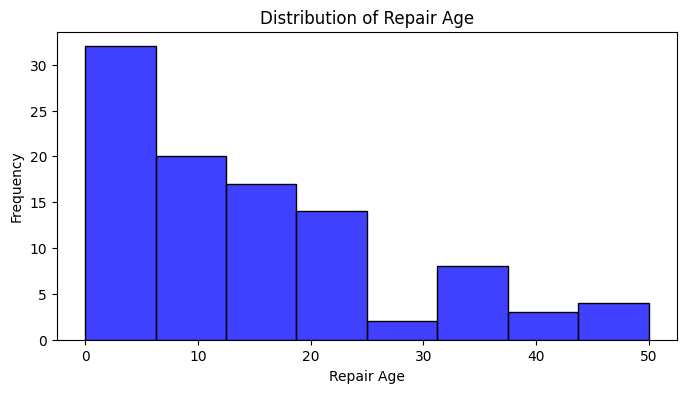

In [26]:
# Distribution of 'REPAIR_AGE'
plt.figure(figsize=(8,4))
sns.histplot(data['REPAIR_AGE'], kde=False, color='blue')
plt.title('Distribution of Repair Age')
plt.xlabel('Repair Age')
plt.ylabel('Frequency')
plt.show()

- Right-skewed distribution
- Most repairs occurs within the first 10 years of vehicle age
- Fewer repairs happen as the vehicle gets older, but some outliers exist (30+ years)
- 0-5 years : Highest repair frequency
- 6-20 years : Gradual decline
- 30+ years : very few cases, indicating rare long-term vehicle maintainance.

- **FREQUENCY OF REPAIRS BY PLATFORM**

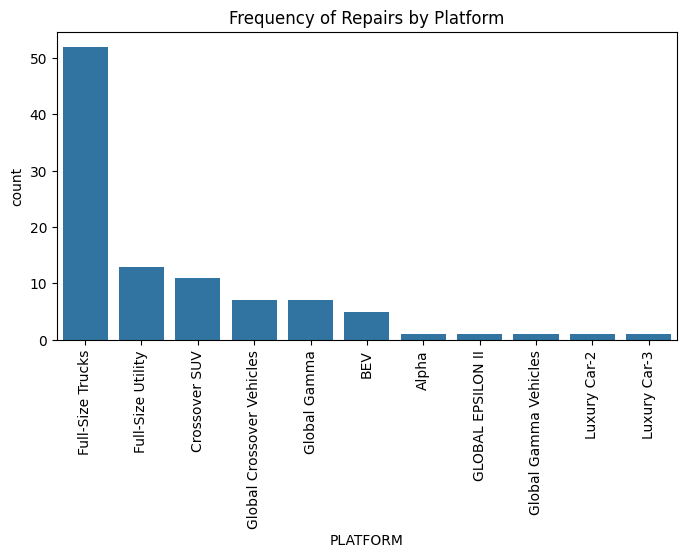

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x="PLATFORM", order=df["PLATFORM"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Frequency of Repairs by Platform")
plt.show()

- Full-size Trucks have the highest repair frequency More than 50% of all repairs
- Full-size utility and crossover SUVs also show significant repair frequency
- common part failure might be the issue.

- **COMMON CASUAL PARTS IN REPAIR**

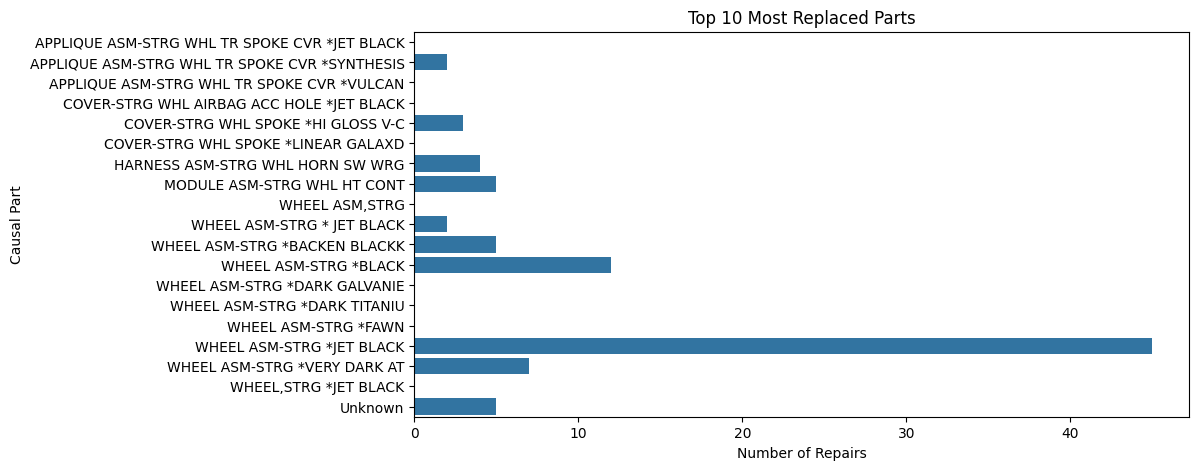

In [28]:
# Top 10 casual parts in repair
top_parts = data["CAUSAL_PART_NM"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_parts.values, y=top_parts.index)
plt.xlabel("Number of Repairs")
plt.ylabel("Causal Part")
plt.title("Top 10 Most Replaced Parts")
plt.show()

- The most frequently replaced part is the **WHEEL ASM-STRG JET BLACK**
- Other steering related parts also appear frequently
- Indiactes steering wheel failures are the primary issue.

**ANALYZING REPAIR COSTS FOR FREQUENTLY REPLACED PARTS**

<ipython-input-29-2a6d1cd5a571>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parts_costs = data.groupby('CAUSAL_PART_NM')['TOTALCOST'].sum().sort_values()


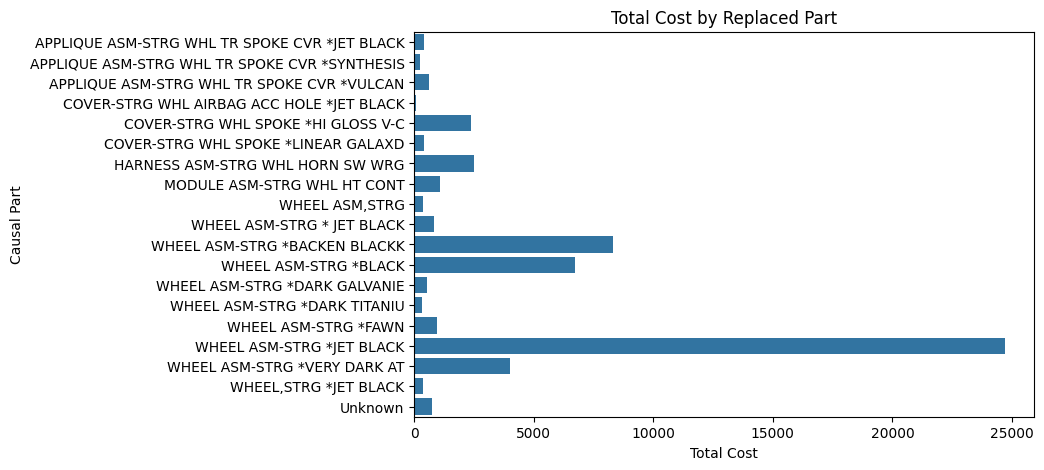

In [29]:
# Group by CASUAL_PART_NM and sum total repair cost
parts_costs = data.groupby('CAUSAL_PART_NM')['TOTALCOST'].sum().sort_values()

# Top most expensive replaced parts
plt.figure(figsize=(8,5))
sns.barplot(x=parts_costs.values, y=parts_costs.index)
plt.xlabel("Total Cost")
plt.ylabel("Causal Part")
plt.title("Total Cost by Replaced Part")
plt.show()

- WHEEL ASM-STRG JET BLACK has the highest total repair cost among all replaced components
- High replacement frequency, expensive manufacturing.

**DISTRIBUTION OF REPAIR COSTS**

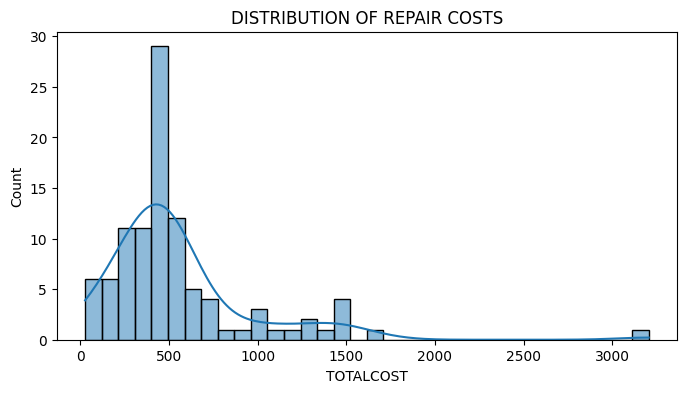

In [30]:
plt.figure(figsize = (8,4))
sns.histplot(data['TOTALCOST'], kde = True)
plt.title('DISTRIBUTION OF REPAIR COSTS')
plt.show()

- Right-skewed distribution
- Most repair cost between 200 and 600, with a peak around 500$
- A long tail extends beyond 1000 indicating some high repair costs.

**TOP 10 MOST COMMON COMPLAINTS**

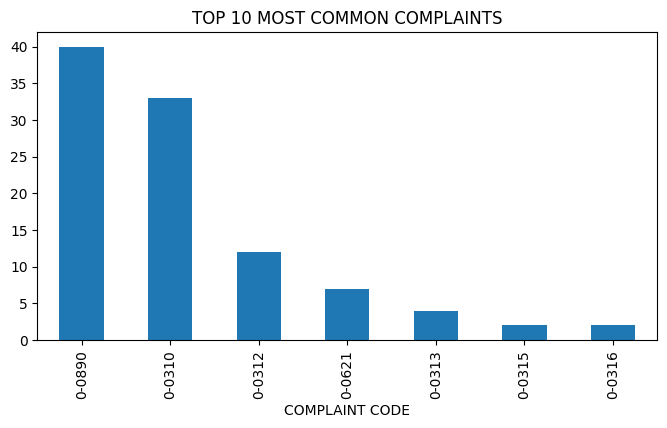

In [31]:
plt.figure(figsize = (8,4))
data['COMPLAINT_CD'].value_counts().head(10).plot(kind = 'bar')
plt.title('TOP 10 MOST COMMON COMPLAINTS')
plt.xlabel('COMPLAINT CODE')
plt.show()

- Complaint code 0-0890 is the most frequent issue appears nearly 40 times
- Complaint code 0-0310 ia also very common over 30 occurrences

**ANALYZING COMPLAINT CODES BY VEHICLE PLATFORM**

<ipython-input-32-e52e693aa986>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complaint_platform = data.groupby('PLATFORM')['COMPLAINT_CD'].value_counts().unstack().fillna(0)


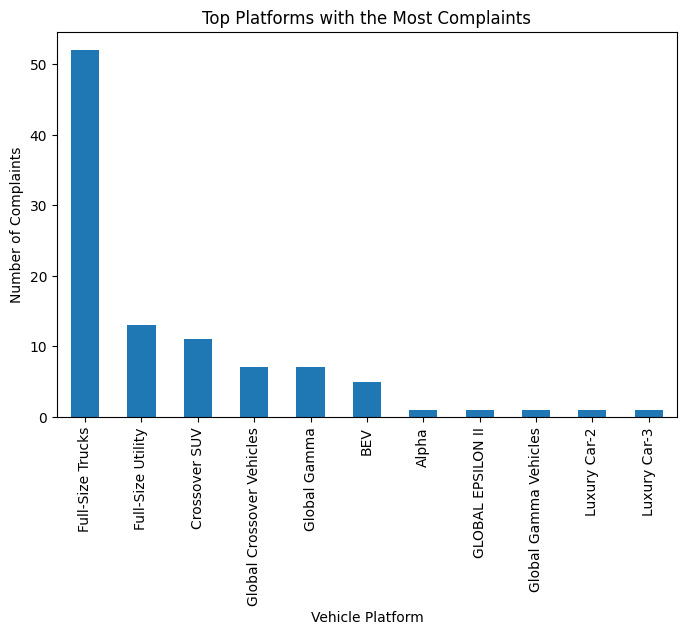

In [32]:
# Identify which vehicle platforms experience the most frequent complaints
# Which platform dominates

# Count occurences of each complaint code by platform
complaint_platform = data.groupby('PLATFORM')['COMPLAINT_CD'].value_counts().unstack().fillna(0)

# Plot the top platforms with the most complaints
plt.figure(figsize=(8,5))
complaint_platform.sum(axis=1).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Vehicle Platform')
plt.ylabel('Number of Complaints')
plt.title('Top Platforms with the Most Complaints')
plt.show()

- Full size Trucks have the high complaint rates

**CORRELATING COMPLAINT CODES WITH REPAIR COSTS**

<ipython-input-38-9ffd31c0bee2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  complaint_costs = data.groupby('COMPLAINT_CD')['TOTALCOST'].sum().sort_values(ascending=False).head(10)


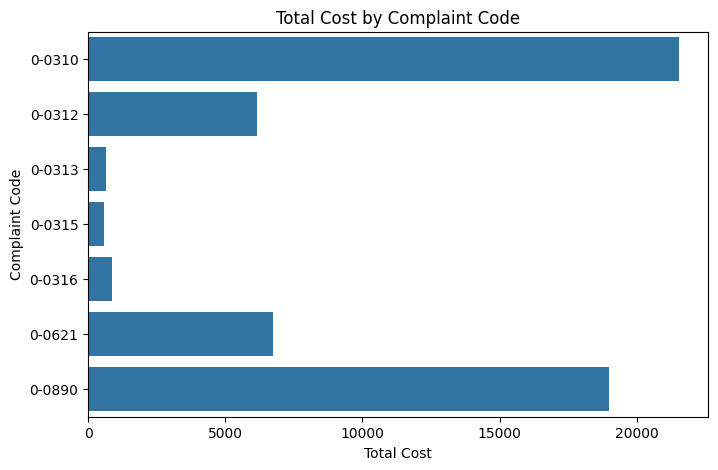

In [38]:
# Group by 'COMPLAINT_CODE' and sum total repair cost
complaint_costs = data.groupby('COMPLAINT_CD')['TOTALCOST'].sum().sort_values(ascending=False).head(10)

# Plot the top complaint code by repair cost
plt.figure(figsize=(8,5))
sns.barplot(x=complaint_costs.values, y=complaint_costs.index)
plt.xlabel("Total Cost")
plt.ylabel("Complaint Code")
plt.title("Total Cost by Complaint Code")
plt.show()

- Complaint code 0-0310 has the highest total repair cost(-20,000+)
- Complaint code 0-0890 is also a high-cost issue (-18000+)

**RELATIONSHIP BETWEEN MILEAGE(KM) & REPAIR COST**

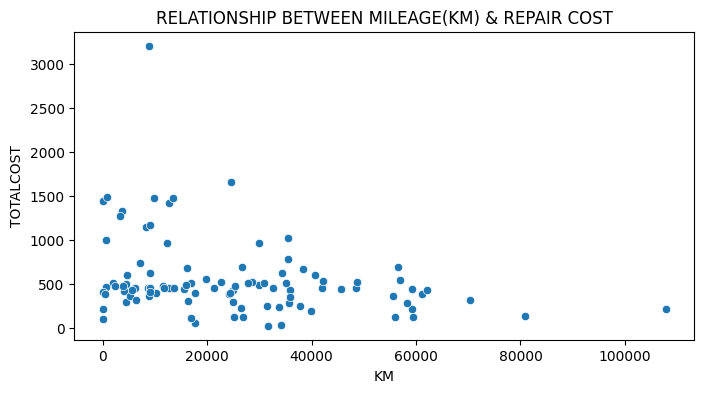

In [34]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'KM', y = 'TOTALCOST', data = data)
plt.title('RELATIONSHIP BETWEEN MILEAGE(KM) & REPAIR COST')
plt.show()

- Repairs occur across a wide range of mileage values.
- Some Low-mileage vehicles have very high repair costs(-3000+), suggests early component failures

**REPAIR COST DISTRIBUTED ACROSS DIFFERENT PLATFORM TYPES**

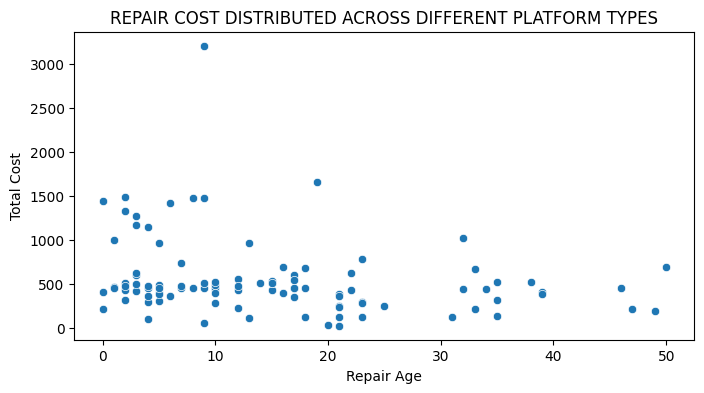

In [39]:
# Scatter plot of Repair Age vs. Total cost
plt.figure(figsize=(8,4))
sns.scatterplot(x='REPAIR_AGE', y='TOTALCOST', data=data)
plt.title('REPAIR COST DISTRIBUTED ACROSS DIFFERENT PLATFORM TYPES')
plt.xlabel('Repair Age')
plt.ylabel('Total Cost')
plt.show()

- Repairs occur at all ages, from 0 to 50+ years
- Many high-cost repairs (1000-3000) occur within the first 10 years of vehicle age
- warranty-related issues, manufacturing defects, or early component failures.
- Some vehicle over 30 years still have expensive repairs(1000+)

**COMPARING HIGH-MILEAGE VS. LOW-MILEAGE FOR REPAIR TRENDS**

<ipython-input-40-01cab991aa57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage_category'] = data['KM'].apply(lambda x:'Low Mileage(<50K)' if x<50000 else 'High Mileage(>=50K)')


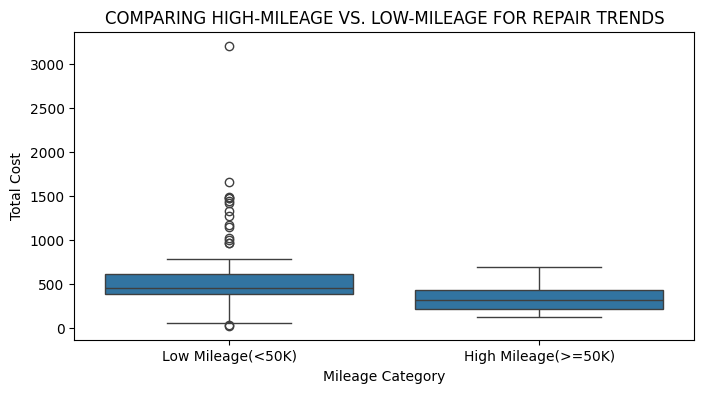

In [40]:
# Categorize vechicles into low and high mileage groups
data['mileage_category'] = data['KM'].apply(lambda x:'Low Mileage(<50K)' if x<50000 else 'High Mileage(>=50K)')

# Boxplot to compare repair costs
plt.figure(figsize=(8,4))
sns.boxplot(x='mileage_category', y='TOTALCOST', data=data)
plt.title('COMPARING HIGH-MILEAGE VS. LOW-MILEAGE FOR REPAIR TRENDS')
plt.xlabel('Mileage Category')
plt.ylabel('Total Cost')
plt.show()

- low mileage vehicles(<50KM) have higher repair costs and more outliers
- There are many high-cost outliers(above $1000), with some exceeding 3000
- Suggests that early failures, manufacturing defects, or warranty repairs
- High mileage vehicles(>=50KM) have lower and more consistent repairs costs.
- The median repair cost is lower compared to low-mileage vehicles
- Suggests that high-mileage vehicles may require regular maintenance.

**REPAIR COST DISTRIBUTED ACROSS DIFFERENT PLATFORM TYPES**

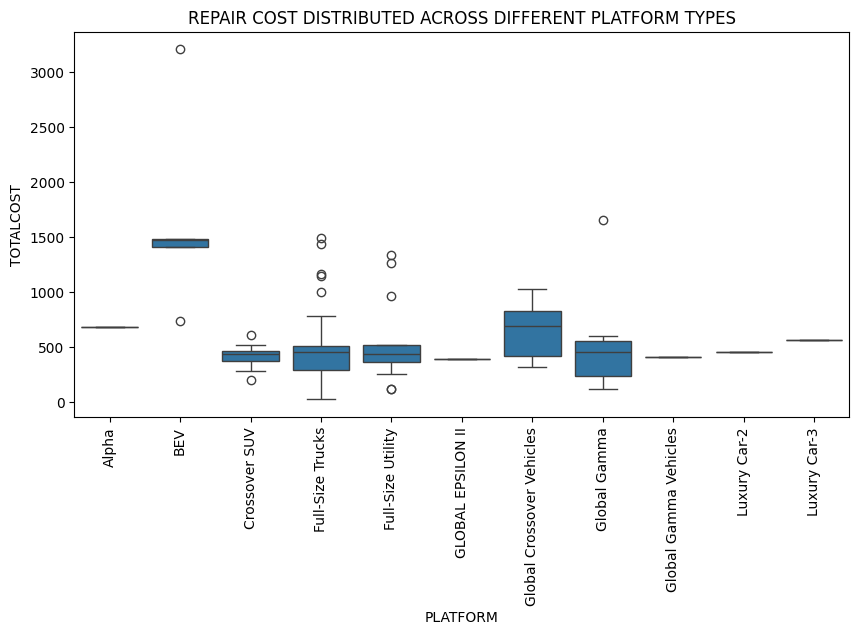

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'PLATFORM', y = 'TOTALCOST', data = data)
plt.title('REPAIR COST DISTRIBUTED ACROSS DIFFERENT PLATFORM TYPES')
plt.xticks(rotation = 90)
plt.show()

- Full-size trucks and Full-size utility have the most variation in repair costs.
- These platforms show a wide range of repair costs, with several outliers above $1000 and even above 3000 in some cases
- Suggests higher complexity repairs or frequent component failures
- BEV(Battery electric vehicles) show high median repair costs
- The median repair cost for BEVs appears higher than most other platforms
- Indicates that BEV repairs might involve high-cost components like batteries or electronic modules.

- **AVERAGE REPAIR COST PER PLATFORM**

<ipython-input-36-a18afb6caf53>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost = data.groupby("PLATFORM")["TOTALCOST"].mean().sort_values()


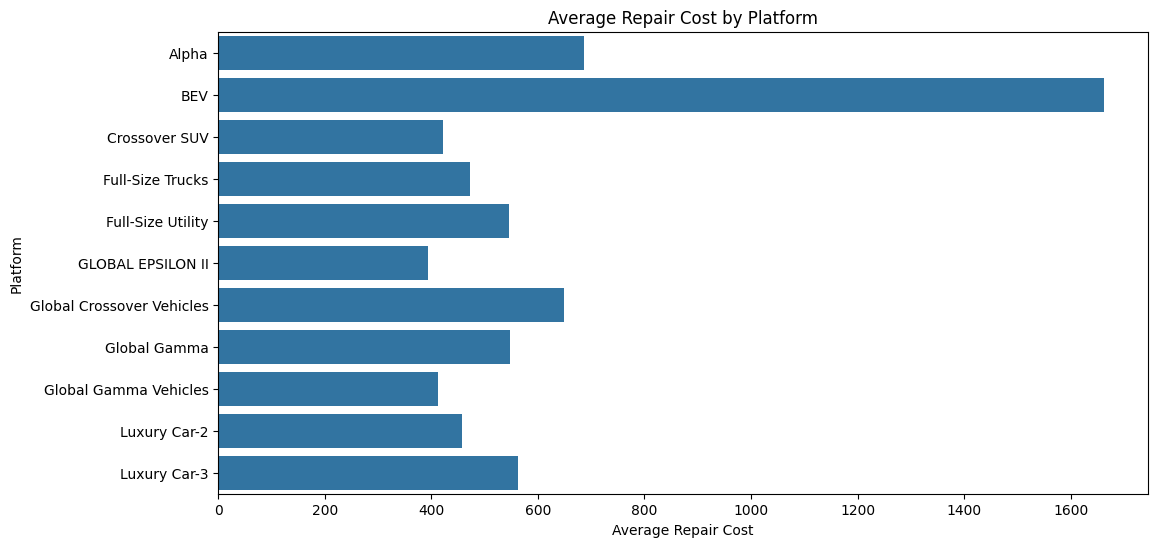

In [36]:
avg_cost = data.groupby("PLATFORM")["TOTALCOST"].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_cost.values, y=avg_cost.index)
plt.xlabel("Average Repair Cost")
plt.ylabel("Platform")
plt.title("Average Repair Cost by Platform")
plt.show()

- Battery electric vehicles(BEV) have the highest average repair cost(-1600+)
- likely due to expensive battery replacements, electronic components failures, or specialized labor requirements.
- Global crossover vehicles & full-size trucks have mid-to-high repair costs(600-800)$
- Suggests that frequent part failures or complex repair procedures.

- **CORRELATION ANALYSIS**

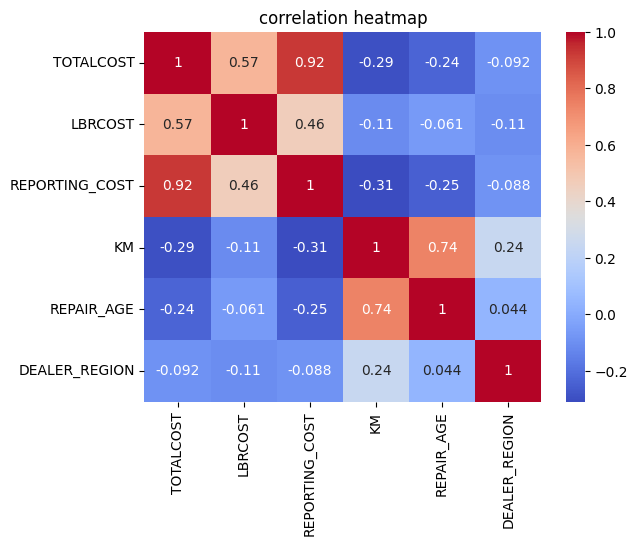

In [37]:
# Correlation heatmap for numerical columns to identify relationships
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

- Strong positive correlation between TOTAL_COST & REPORTING_COST(0.92)
- Indicate that reporting costs significantly contribute to total repair expenses
- Moderate positive correlation between TOTALCOST & LBRCOST(0.57)
- High positive correlation between KM & REPAIR_AGE(0.74)
- Older vehicles have more mileage which is expected.

## **INSIGHTS**

In [2]:
Insights = '''
1.Full-size trucks have the highest repair frequency More than 50% of all repairs
2.BEV's have the highest average repair cost likely due to component failures
3.Newer vehicles have higher repair costs than older ones
4.Expensive early-life failures indiacte possible manufacturing defects
5.High mileage vehicles have Lower cost maintenance
6.Reporting costs(admin fees, paper work) have a strong impact on total cost
7.labor costs also less significant
8.Steering wheels, batteries, and electronic modules are the most frequently replaced and high cost components
'''
print(Insights)


1.Full-size trucks have the highest repair frequency More than 50% of all repairs
2.BEV's have the highest average repair cost likely due to component failures
3.Newer vehicles have higher repair costs than older ones
4.Expensive early-life failures indiacte possible manufacturing defects
5.High mileage vehicles have Lower cost maintenance
6.Reporting costs(admin fees, paper work) have a strong impact on total cost
7.labor costs also less significant
8.Steering wheels, batteries, and electronic modules are the most frequently replaced and high cost components



In [5]:
recommendations = '''
1.Investigate why newer vehicles have costly repairs and improve component durability
2.Reduce report costs in the repair process
3.Improve battery and steering wheel design in BEV's and Full-size trucks
'''
print(recommendations)


1.Investigate why newer vehicles have costly repairs and improve component durability
2.Reduce report costs in the repair process
3.Improve battery and steering wheel design in BEV's and Full-size trucks

